# Time Series Exploration for INSPIRE data

## Importing Libraries

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt

## Defining Paths

In [2]:
inspire_path = Path("/home/server/Projects/data/INSPIRE/physionet.org/files/inspire/1.3")
ops_path = inspire_path / "operations.csv"
labs_path = inspire_path / "labs.csv"
vitals_path = inspire_path / "vitals.csv"
ward_vitals_path = inspire_path / "ward_vitals.csv"
combined_path = inspire_path / "combined_data.csv"
combined_cleaned_path = inspire_path / "combined_cleaned_data.csv"
pca_path = inspire_path / "pca_data.csv"

## Exploring Vitals.csv
### CSV import as df_vitals

In [4]:
# Load the data
df_vitals = pd.read_csv(vitals_path.as_posix())

# Display basic information
print("\nDataFrame Shape:")
print(df_vitals.shape)

print("\nColumn Names:")
print(df_vitals.columns.tolist())

print("\nData Types:")
print(df_vitals.dtypes)

print("\nBasic Statistics:")
print(df_vitals.describe())

print("\nMissing Values:")
print(df_vitals.isnull().sum())

# Display first few rows
print("\nFirst 5 rows:")
print(df_vitals.head())


DataFrame Shape:
(66127940, 5)

Column Names:
['op_id', 'subject_id', 'chart_time', 'item_name', 'value']

Data Types:
op_id           int64
subject_id      int64
chart_time      int64
item_name      object
value         float64
dtype: object

Basic Statistics:
              op_id    subject_id    chart_time         value
count  6.612794e+07  6.612794e+07  6.612794e+07  6.612794e+07
mean   4.501949e+08  1.500362e+08  2.081616e+05  6.335775e+01
std    2.899169e+07  2.880297e+07  6.485078e+05  1.010078e+02
min    4.000005e+08  1.000008e+08 -1.440000e+03 -7.500000e+00
25%    4.249949e+08  1.251254e+08  2.260000e+03  9.500000e+00
50%    4.503567e+08  1.501092e+08  3.605000e+03  3.500000e+01
75%    4.754103e+08  1.749456e+08  9.470000e+03  8.000000e+01
max    4.999990e+08  1.999994e+08  5.185440e+06  6.468000e+03

Missing Values:
op_id         0
subject_id    0
chart_time    0
item_name     0
value         0
dtype: int64

First 5 rows:
       op_id  subject_id  chart_time item_name  value


In [5]:
df_ops = pd.read_csv(ops_path.as_posix())

# Display comprehensive overview
print("DataFrame Info:")
print(df_ops.info())

print("\nShape:", df_ops.shape)
print("\nColumns:", df_ops.columns.tolist())

print("\nData Types:")
print(df_ops.dtypes)

print("\nSummary Statistics:")
print(df_ops.describe())

print("\nMissing Values:")
print(df_ops.isnull().sum())

print("\nSample Data (First 5 rows):")
print(df_ops.head())

# Optional: Display unique values in categorical columns
print("\nUnique values in each column:")
for col in df_ops.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    print(df_ops[col].value_counts().head())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130960 entries, 0 to 130959
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   op_id                130960 non-null  int64  
 1   subject_id           130960 non-null  int64  
 2   hadm_id              130960 non-null  int64  
 3   case_id              21099 non-null   float64
 4   opdate               130960 non-null  int64  
 5   age                  130960 non-null  int64  
 6   sex                  130960 non-null  object 
 7   weight               129493 non-null  float64
 8   height               130172 non-null  float64
 9   race                 130960 non-null  object 
 10  asa                  127413 non-null  float64
 11  emop                 130960 non-null  int64  
 12  department           130960 non-null  object 
 13  antype               130960 non-null  object 
 14  icd10_pcs            130960 non-null  object 
 15  o

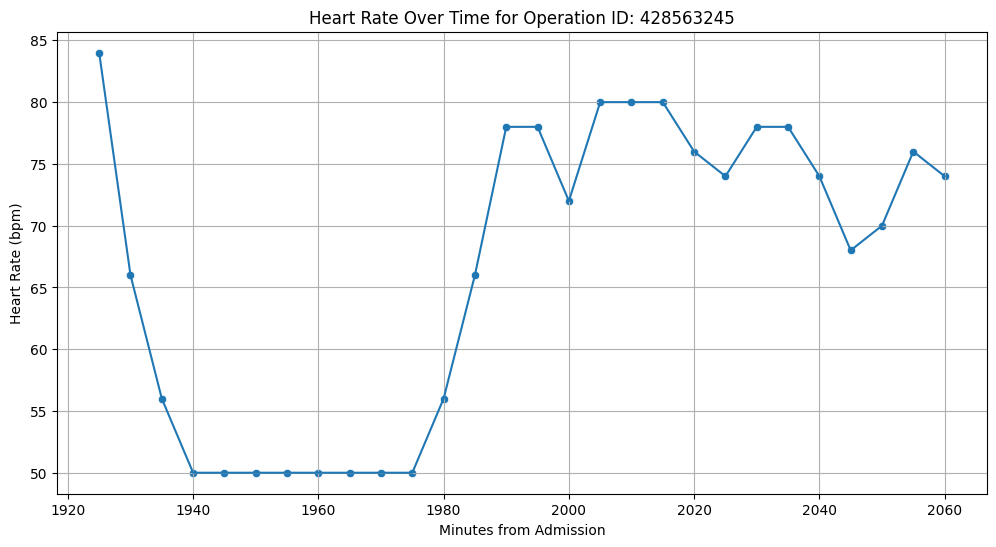


Basic statistics for this patient's heart rate:
count    28.000000
mean     66.571429
std      12.434804
min      50.000000
25%      50.000000
50%      71.000000
75%      78.000000
max      84.000000
Name: value, dtype: float64


In [6]:
# Filter data for heart rate measurements and specific operation
hr_data = df_vitals[
    (df_vitals['item_name'].str.contains('hr', case=False)) & 
    (df_vitals['op_id'] == 428563245)
].copy()

# Sort by chart_time
hr_data = hr_data.sort_values('chart_time')

# Create the plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=hr_data, x='chart_time', y='value')
sns.lineplot(data=hr_data, x='chart_time', y='value')

# Customize the plot
plt.title('Heart Rate Over Time for Operation ID: 428563245')
plt.xlabel('Minutes from Admission')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)

# Show the plot
plt.show()

# Display basic stats of the filtered data
print("\nBasic statistics for this patient's heart rate:")
print(hr_data['value'].describe())